### Example for four dihedral angle pairs of a biomolecule.

In [1]:
%matplotlib inline

# Import libraries
import numpy as np
from scipy.linalg import eigh
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#  Read input files
df_a = pd.read_table('dihedral-a.dat', delim_whitespace=True, names=['frame', 'a_psi', 'a_phi'])
df_a = df_a[df_a['frame'] != '#Frame'].drop('frame', axis=1).astype(float)

df_b = pd.read_table('dihedral-b.dat', delim_whitespace=True, names=['frame', 'b_psi', 'b_phi'])
df_b = df_b[df_b['frame'] != '#Frame'].drop('frame', axis=1).astype(float)

df_c = pd.read_table('dihedral-c.dat', delim_whitespace=True, names=['frame', 'c_psi', 'c_phi'])
df_c = df_c[df_c['frame'] != '#Frame'].drop('frame', axis=1).astype(float)

df_d = pd.read_table('dihedral-d.dat', delim_whitespace=True, names=['frame', 'd_psi', 'd_phi'])
df_d = df_d[df_d['frame'] != '#Frame'].drop('frame', axis=1).astype(float)

In [3]:
# Sine/cosine-transforming
def transform(df):
    psi_sin = []
    psi_cos = []
    phi_sin = []
    phi_cos = []
    
    for i, v in df.iterrows():
        psi_sin.append(np.sin(v[0]) * np.pi / 180)
        psi_cos.append(np.cos(v[0]) * np.pi / 180)
        phi_sin.append(np.sin(v[1]) * np.pi / 180)
        phi_cos.append(np.cos(v[1]) * np.pi / 180)

    df_transformed = pd.DataFrame({'psi_sin':  psi_sin, 'psi_cos': psi_cos, 'phi_sin': phi_cos, 'phi_cos': phi_sin})
    return df_transformed

In [4]:
df_a = transform(df_a)
df_b = transform(df_b)
df_c = transform(df_c)
df_d = transform(df_d)

In [5]:
df_total = pd.concat([df_a, df_b, df_c, df_d], axis=1)
df_total.head(10)

,phi_cos,phi_sin,psi_cos,psi_sin,phi_cos,phi_sin,psi_cos,psi_sin,phi_cos,phi_sin,psi_cos,psi_sin,phi_cos,phi_sin,psi_cos,psi_sin
0,0.016793,-0.004756,-0.013694,0.010820,0.000549,0.017445,0.001475,-0.017391,-0.013179,0.011442,-0.001597,0.017380,-0.015447,0.008125,0.015156,-0.008655
1,-0.001346,0.017401,-0.009749,-0.014477,-0.016554,0.005529,0.008167,-0.015425,-0.006699,0.016116,0.015602,0.007823,-0.007017,-0.015981,-0.015960,-0.007064
2,0.009580,0.014589,-0.016690,-0.005104,0.014496,-0.009720,-0.012002,-0.012671,-0.010715,0.013777,0.010081,-0.014247,0.010825,-0.013691,0.008356,0.015323
3,0.013281,-0.011324,-0.016620,-0.005329,-0.016658,-0.005209,-0.016936,-0.004216,0.009740,-0.014483,0.017408,-0.001254,-0.017366,-0.001747,-0.014502,-0.009711
4,0.015951,0.007084,-0.015520,0.007984,0.006433,0.016224,-0.001673,-0.017373,-0.015658,-0.007710,0.017332,-0.002052,-0.014980,-0.008956,0.017404,-0.001316
5,0.006908,0.016028,-0.006397,-0.016239,-0.000470,-0.017447,0.013283,0.011322,0.017207,0.002919,-0.016043,-0.006873,0.012809,0.011855,-0.000469,-0.017447
6,-0.007895,-0.015565,-0.014461,-0.009773,-0.004689,-0.016812,0.014667,0.009460,-0.004520,0.016858,0.008584,0.015196,0.013502,-0.011059,0.017400,0.001362
7,0.017398,0.001383,0.005255,0.016643,0.017442,0.000622,-0.012654,0.012020,0.003943,0.017002,-0.015109,0.008737,0.003848,0.017024,0.012474,0.012207
8,0.017255,-0.002624,-0.015463,0.008093,-0.000493,-0.017446,0.011602,0.013039,0.007653,0.015686,-0.017448,0.000423,-0.013715,-0.010794,-0.007129,-0.015931
9,-0.015841,0.007326,-0.009852,-0.014407,-0.008302,-0.015352,0.016317,-0.006193,0.012174,-0.012506,-0.017194,-0.002997,-0.014785,0.009275,0.014816,-0.009225


***
### Gaussian kernel
$$
\begin{align}
k({\mathbf x, \mathbf x'}) = \exp(-\sigma\|\mathbf x-\mathbf　x'\|^{2})
\end{align}
$$
### Polynomial kernel
$$
\begin{align}
k({\mathbf x, \mathbf x'}) = (\mathbf　x\cdot \mathbf x'+1)^{\sigma}
\end{align}
$$
### Linear kernel (normal PCA)
$$
\begin{align}
k({\mathbf x, \mathbf x'}) = \mathbf　x\cdot \mathbf x'
\end{align}
$$
***

In [6]:
# Implementation of Kernel PCA
def get_kernel(sigma=10):
    def kernel(x0, x1):
        return np.exp(- sigma * (np.linalg.norm(x0 - x1) ** 2)) # Gaussian kernel
        #return (np.dot(x0,x1) + 1) ** sigma # Polynomial kernel
        #return np.dot(x0,x1) # Linear kernel
    return kernel

In [7]:
def kpca(train_data, kernel):
    N = len(train_data)
    k0 = np.zeros(shape=(N,N))

    for n0, x0 in train_data.iterrows():
        for n1, x1 in train_data.iterrows():
            k0[n0,n1] = kernel(x0,x1)

    one_n = np.ones(shape=(N,N)) / N
    gram = k0 - one_n.dot(k0) - k0.dot(one_n) + one_n.dot(k0).dot(one_n)
    eigvals, eigvecs = eigh(gram)
    
    def projection(x, i):
        pc = 0
        for n in range(N):
            pc += eigvecs[n,-i] * kernel(x, train_data.iloc[n])
        return pc / np.sqrt(eigvals[-i] * N)
    
    return projection

In [8]:
# Perform Kernel PCA to dihedral angle pairs
df_train = df_total.sample(100).reset_index(drop=True)
projection = kpca(df_train, get_kernel(1700))

Text(0,0.5,'PC2')

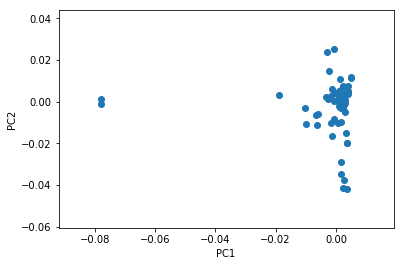

In [9]:
# Plot the results
PC1 = [projection(v,1) for i, v in df_train.iterrows()]
PC2 = [projection(v,2) for i, v in df_train.iterrows()]
plt.scatter(PC1, PC2)
plt.xlabel('PC1')
plt.ylabel('PC2')